In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
import sys
from torchvision.datasets import MNIST
from torchvision.transforms import v2
import matplotlib.pyplot as plt

sys.path.append("..")

from tiny import Diffusion
from tiny.utils import plot_images, to_pil_image

In [6]:
# device = "cuda" if torch.cuda.is_available() else "cpu"

In [13]:
num_timesteps = 1000
diffusion = Diffusion(num_timesteps=num_timesteps, schedule_type="linear")

In [14]:
dataset = MNIST(root="../data", train=True, download=True, transform=v2.Compose([
    v2.ToTensor(),
    v2.Resize(32),
    v2.Normalize((0.5,), (0.5,))
]))

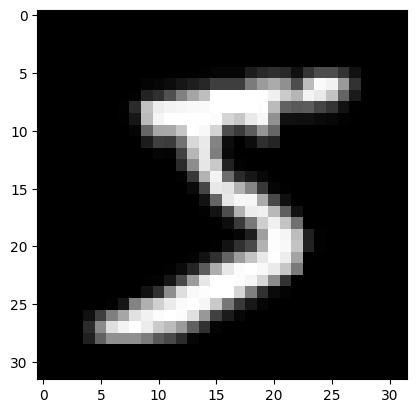

In [15]:
image = dataset[0][0]
plt.imshow(to_pil_image(image.cpu()), cmap="gray")

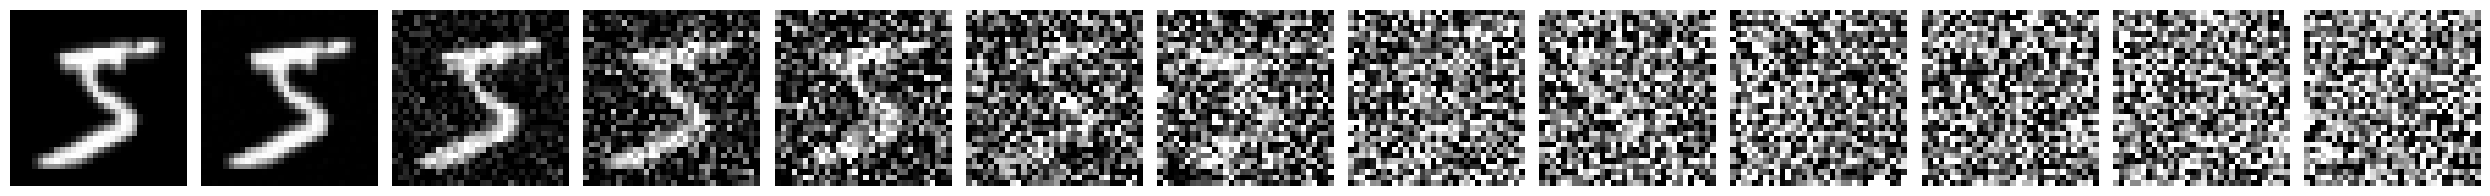

In [16]:
plot_images([to_pil_image(image), *[to_pil_image(
    diffusion.q_sample(image, t.unsqueeze(0))
) for t in torch.linspace(0, num_timesteps - 1, 12).int()]], cmap="gray")

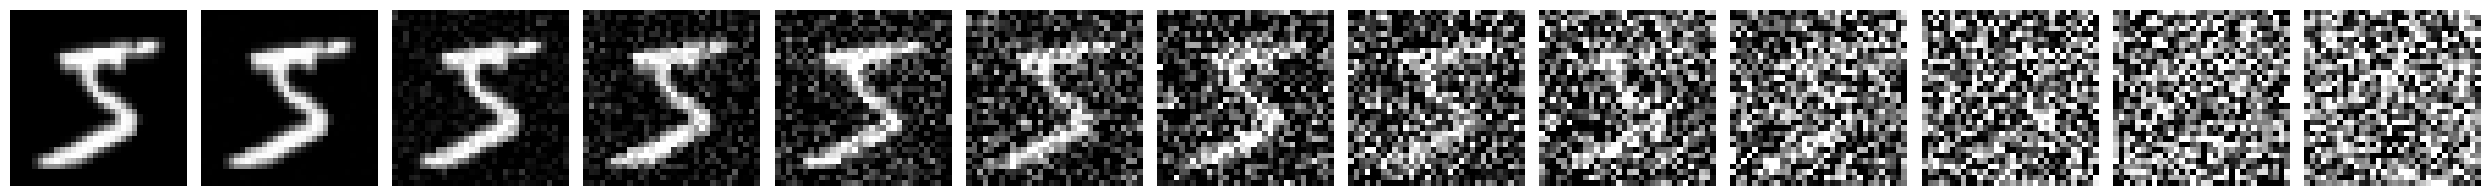

In [12]:
plot_images([to_pil_image(image), *[to_pil_image(
    diffusion.q_sample(image, t.unsqueeze(0))
) for t in torch.linspace(0, num_timesteps - 1, 12).int()]], cmap="gray")